##Importing & Pre-Processing
Importing required libraries, loading dataframe in dataset and creating a copy of dataset - df on which the work is going to be done.



---





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
le = LabelEncoder()
dataset = pd.read_csv('1828206.csv')
df = dataset.copy()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              46467 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

#checking null values

In [ ]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                 3533
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    3
isOpen                        0
dtype: int64

In [ ]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.00000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999700e+04,50000.000000
mean,2019.19258,2.011431e+09,2.019239e+07,2.019243e+07,2.019258e+07,1.0,NaN,32438.416809,2.019243e+07,2.010982e+09,0.070660
std,0.39433,2.821440e+08,3.816326e+03,3.807716e+03,3.823121e+03,0.0,NaN,40250.773042,3.808849e+03,2.761247e+08,0.256259
min,2019.00000,1.928502e+09,2.018123e+07,2.018113e+07,2.018121e+07,1.0,NaN,0.770000,2.018112e+07,1.928502e+09,0.000000
25%,2019.00000,1.929233e+09,2.019042e+07,2.019042e+07,2.019051e+07,1.0,NaN,4748.305000,2.019042e+07,1.929233e+09,0.000000
50%,2019.00000,1.929798e+09,2.019080e+07,2.019081e+07,2.019082e+07,1.0,NaN,17304.980000,2.019081e+07,1.929798e+09,0.000000
75%,2019.00000,1.930378e+09,2.019112e+07,2.019112e+07,2.019121e+07,1.0,NaN,47025.365000,2.019112e+07,1.930378e+09,0.000000
max,2020.00000,9.500000e+09,2.020052e+07,2.020052e+07,2.020070e+07,1.0,NaN,620553.450000,2.020052e+07,2.960635e+09,1.000000


changing the dataypes to int and time format


In [ ]:
df[['due_in_date','baseline_create_date','buisness_year']]=df[['due_in_date','baseline_create_date','buisness_year']].astype('int64')
df[['clear_date','posting_date','document_create_date','document_create_date.1','due_in_date','baseline_create_date']]=df[['clear_date','posting_date','document_create_date','document_create_date.1','due_in_date','baseline_create_date']].astype(str)

In [ ]:
df['posting_date']= pd.to_datetime(df['posting_date'])
df['document_create_date']=pd.to_datetime(df['document_create_date'],format="%Y-%m-%d")
df['document_create_date.1']=pd.to_datetime(df['document_create_date.1'],format="%Y-%m-%d")
df['clear_date']=pd.to_datetime(df['clear_date'],format="%Y-%m-%d")
df['due_in_date']=pd.to_datetime(df['due_in_date'],format="%Y-%m-%d")
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'],format="%Y-%m-%d")
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR in,2019-05-13,2019,1.929233e+09,2019-05-01,2019-04-30,2019-05-01,2019-05-16,USD,RV,1.0,NaN,52420.89,2019-05-01,NAH4,1.929233e+09,0
1,U001,200769623,WAL-MAR co,2019-07-15,2019,1.929554e+09,2019-06-28,2019-06-27,2019-06-28,2019-07-13,USD,RV,1.0,NaN,24452.04,2019-06-28,NAH4,1.929554e+09,0
2,U001,0200418007,AM corp,2019-11-08,2019,1.930028e+09,2019-10-24,2019-10-17,2019-10-24,2019-11-08,USD,RV,1.0,NaN,38546.95,2019-10-24,NAA8,1.930028e+09,0
3,U001,0200936373,SUPE corp,2019-12-30,2019,1.930272e+09,2019-12-12,2019-12-12,2019-12-12,2019-12-27,USD,RV,1.0,NaN,9584.85,2019-12-12,NAA8,1.930272e+09,0
4,U001,0200714710,SYSCO llc,2019-01-30,2019,1.928632e+09,2019-01-17,2019-01-15,2019-01-17,2019-02-01,USD,RV,1.0,NaN,2192.96,2019-01-17,NAA8,1.928632e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200794332,COST in,NaT,2020,1.930587e+09,2020-03-03,2020-03-02,2020-03-03,2020-03-18,USD,RV,1.0,NaN,76090.08,2020-03-03,NAAX,1.930587e+09,1
49996,U001,0100031704,DELHAIZE in,NaT,2020,1.930639e+09,2020-03-12,2020-03-11,2020-03-12,2020-03-27,USD,RV,1.0,NaN,6442.65,2020-03-12,NAA8,1.930639e+09,1
49997,CA02,0140104240,FEDER in,NaT,2020,2.960629e+09,2020-04-16,2020-04-16,2020-04-16,2020-04-28,CAD,RV,1.0,NaN,23313.43,2020-04-18,CA10,2.960629e+09,1
49998,U001,0200769623,WAL-MAR in,NaT,2020,1.930704e+09,2020-03-28,2020-03-26,2020-03-28,2020-04-12,USD,RV,1.0,NaN,39195.61,2020-03-28,NAH4,1.930704e+09,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           50000 non-null  object        
 1   cust_number             50000 non-null  object        
 2   name_customer           50000 non-null  object        
 3   clear_date              46467 non-null  datetime64[ns]
 4   buisness_year           50000 non-null  int64         
 5   doc_id                  50000 non-null  float64       
 6   posting_date            50000 non-null  datetime64[ns]
 7   document_create_date    50000 non-null  datetime64[ns]
 8   document_create_date.1  50000 non-null  datetime64[ns]
 9   due_in_date             50000 non-null  datetime64[ns]
 10  invoice_currency        50000 non-null  object        
 11  document type           50000 non-null  object        
 12  posting_id              50000 non-null  float6

droping the columns not required

In [ ]:
df.drop(columns=['area_business','invoice_id' , 'posting_id' , 'isOpen' , 'buisness_year' ,'document type' , 'document_create_date','doc_id'],inplace=True)
df

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR in,2019-05-13,2019-05-01,2019-05-01,2019-05-16,USD,52420.89,2019-05-01,NAH4
1,U001,200769623,WAL-MAR co,2019-07-15,2019-06-28,2019-06-28,2019-07-13,USD,24452.04,2019-06-28,NAH4
2,U001,0200418007,AM corp,2019-11-08,2019-10-24,2019-10-24,2019-11-08,USD,38546.95,2019-10-24,NAA8
3,U001,0200936373,SUPE corp,2019-12-30,2019-12-12,2019-12-12,2019-12-27,USD,9584.85,2019-12-12,NAA8
4,U001,0200714710,SYSCO llc,2019-01-30,2019-01-17,2019-01-17,2019-02-01,USD,2192.96,2019-01-17,NAA8
...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200794332,COST in,NaT,2020-03-03,2020-03-03,2020-03-18,USD,76090.08,2020-03-03,NAAX
49996,U001,0100031704,DELHAIZE in,NaT,2020-03-12,2020-03-12,2020-03-27,USD,6442.65,2020-03-12,NAA8
49997,CA02,0140104240,FEDER in,NaT,2020-04-16,2020-04-16,2020-04-28,CAD,23313.43,2020-04-18,CA10
49998,U001,0200769623,WAL-MAR in,NaT,2020-03-28,2020-03-28,2020-04-12,USD,39195.61,2020-03-28,NAH4


In [ ]:
df['week_name'] = df['document_create_date.1'].dt.day_name()
df

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,week_name
0,U001,0200769623,WAL-MAR in,2019-05-13,2019-05-01,2019-05-01,2019-05-16,USD,52420.89,2019-05-01,NAH4,Wednesday
1,U001,200769623,WAL-MAR co,2019-07-15,2019-06-28,2019-06-28,2019-07-13,USD,24452.04,2019-06-28,NAH4,Friday
2,U001,0200418007,AM corp,2019-11-08,2019-10-24,2019-10-24,2019-11-08,USD,38546.95,2019-10-24,NAA8,Thursday
3,U001,0200936373,SUPE corp,2019-12-30,2019-12-12,2019-12-12,2019-12-27,USD,9584.85,2019-12-12,NAA8,Thursday
4,U001,0200714710,SYSCO llc,2019-01-30,2019-01-17,2019-01-17,2019-02-01,USD,2192.96,2019-01-17,NAA8,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200794332,COST in,NaT,2020-03-03,2020-03-03,2020-03-18,USD,76090.08,2020-03-03,NAAX,Tuesday
49996,U001,0100031704,DELHAIZE in,NaT,2020-03-12,2020-03-12,2020-03-27,USD,6442.65,2020-03-12,NAA8,Thursday
49997,CA02,0140104240,FEDER in,NaT,2020-04-16,2020-04-16,2020-04-28,CAD,23313.43,2020-04-18,CA10,Thursday
49998,U001,0200769623,WAL-MAR in,NaT,2020-03-28,2020-03-28,2020-04-12,USD,39195.61,2020-03-28,NAH4,Saturday


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
#sns.catplot(x = 'week_name', y = 'total_open_amount',  data=final.query('total_open_amount <100') , kind='swarm', hue= 'USD')

In [ ]:
#sns.catplot(x = 'week_name', y = 'total_open_amount', data=final , hue= 'USD')

label encoding

In [ ]:
df.invoice_currency = le.fit_transform(df.invoice_currency)
df

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,week_name
0,U001,0200769623,WAL-MAR in,2019-05-13,2019-05-01,2019-05-01,2019-05-16,1,52420.89,2019-05-01,NAH4,Wednesday
1,U001,200769623,WAL-MAR co,2019-07-15,2019-06-28,2019-06-28,2019-07-13,1,24452.04,2019-06-28,NAH4,Friday
2,U001,0200418007,AM corp,2019-11-08,2019-10-24,2019-10-24,2019-11-08,1,38546.95,2019-10-24,NAA8,Thursday
3,U001,0200936373,SUPE corp,2019-12-30,2019-12-12,2019-12-12,2019-12-27,1,9584.85,2019-12-12,NAA8,Thursday
4,U001,0200714710,SYSCO llc,2019-01-30,2019-01-17,2019-01-17,2019-02-01,1,2192.96,2019-01-17,NAA8,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200794332,COST in,NaT,2020-03-03,2020-03-03,2020-03-18,1,76090.08,2020-03-03,NAAX,Tuesday
49996,U001,0100031704,DELHAIZE in,NaT,2020-03-12,2020-03-12,2020-03-27,1,6442.65,2020-03-12,NAA8,Thursday
49997,CA02,0140104240,FEDER in,NaT,2020-04-16,2020-04-16,2020-04-28,0,23313.43,2020-04-18,CA10,Thursday
49998,U001,0200769623,WAL-MAR in,NaT,2020-03-28,2020-03-28,2020-04-12,1,39195.61,2020-03-28,NAH4,Saturday


### SPLITING the dataset into clear_date null and not null 

In [ ]:
train_set=df[df.clear_date.notnull()]
train_set=train_set.sort_values(['document_create_date.1'])
train_set

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,week_name
28271,CA02,0140104409,LOB us,2019-12-27,2019-03-29,2018-11-26,2018-12-06,0,420.40,2018-11-26,CA10,Monday
7912,U001,0200744019,TARG us,2019-01-22,2018-12-30,2018-12-30,2019-01-14,1,9455.95,2018-12-30,NAA8,Sunday
24695,U001,0200769623,WAL-MAR corp,2019-01-10,2018-12-30,2018-12-30,2019-01-14,1,36647.37,2018-12-30,NAH4,Sunday
26186,U001,0200726979,BJ'S trust,2019-01-15,2018-12-30,2018-12-30,2019-01-14,1,169.40,2018-12-30,NAA8,Sunday
36690,U001,0200769623,WAL-MAR in,2019-01-09,2018-12-30,2018-12-30,2019-01-14,1,21171.35,2018-12-30,NAH4,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...
31753,U001,0200413833,LDC corp,2020-03-20,2020-02-27,2020-02-27,2020-03-13,1,28311.65,2020-02-27,NAA8,Thursday
1252,CA02,0140105847,GORDON F,2020-03-13,2020-02-27,2020-02-27,2020-03-16,0,964.74,2020-03-06,CA10,Thursday
22310,U001,0200794332,COST in,2020-03-12,2020-02-27,2020-02-27,2020-03-13,1,13720.67,2020-02-27,NAAX,Thursday
44864,U001,0200126819,MCLANE systems,2020-03-18,2020-02-27,2020-02-27,2020-03-13,1,53264.58,2020-02-27,NAA8,Thursday


In [ ]:
test_set=df[df.clear_date.isnull()]
test_set

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,week_name
46467,U001,0200744019,TARG llc,NaT,2020-04-03,2020-04-03,2020-04-18,1,14732.09,2020-04-03,NAA8,Friday
46468,U001,0200793568,SUPE,NaT,2020-05-06,2020-05-06,2020-05-21,1,6427.69,2020-05-06,NAA8,Wednesday
46469,U001,0200592182,DECA,NaT,2020-04-24,2020-04-24,2020-04-26,1,17300.27,2020-04-16,NAM2,Friday
46470,U001,0200920735,ALBERT associates,NaT,2020-03-18,2020-03-18,2020-04-02,1,134770.75,2020-03-18,NAA8,Wednesday
46471,CA02,0140105847,GORDON F co,NaT,2020-03-18,2020-03-18,2020-03-30,0,2310.00,2020-03-20,CA10,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200794332,COST in,NaT,2020-03-03,2020-03-03,2020-03-18,1,76090.08,2020-03-03,NAAX,Tuesday
49996,U001,0100031704,DELHAIZE in,NaT,2020-03-12,2020-03-12,2020-03-27,1,6442.65,2020-03-12,NAA8,Thursday
49997,CA02,0140104240,FEDER in,NaT,2020-04-16,2020-04-16,2020-04-28,0,23313.43,2020-04-18,CA10,Thursday
49998,U001,0200769623,WAL-MAR in,NaT,2020-03-28,2020-03-28,2020-04-12,1,39195.61,2020-03-28,NAH4,Saturday


In [ ]:
train_set['delay']=(train_set['clear_date']-train_set['due_in_date']).dt.days
train_set['delay']

28271    386
7912       8
24695     -4
26186      1
36690     -5
        ... 
31753      7
1252      -3
22310     -1
44864      5
20125      3
Name: delay, Length: 46467, dtype: int64

### log transformation in delay coloumn



In [ ]:
train_set['log_delay'] = (train_set['delay']-train_set['delay'].min()+1) .transform(np.log)
train_set['log_delay'].describe()

count    46467.000000
mean         4.513502
std          0.118722
min          0.000000
25%          4.477337
50%          4.510860
75%          4.532599
max          6.167516
Name: log_delay, dtype: float64

In [ ]:
train_set

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,week_name,delay,log_delay
28271,CA02,0140104409,LOB us,2019-12-27,2019-03-29,2018-11-26,2018-12-06,0,420.40,2018-11-26,CA10,Monday,386,6.167516
7912,U001,0200744019,TARG us,2019-01-22,2018-12-30,2018-12-30,2019-01-14,1,9455.95,2018-12-30,NAA8,Sunday,8,4.595120
24695,U001,0200769623,WAL-MAR corp,2019-01-10,2018-12-30,2018-12-30,2019-01-14,1,36647.37,2018-12-30,NAH4,Sunday,-4,4.465908
26186,U001,0200726979,BJ'S trust,2019-01-15,2018-12-30,2018-12-30,2019-01-14,1,169.40,2018-12-30,NAA8,Sunday,1,4.521789
36690,U001,0200769623,WAL-MAR in,2019-01-09,2018-12-30,2018-12-30,2019-01-14,1,21171.35,2018-12-30,NAH4,Sunday,-5,4.454347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31753,U001,0200413833,LDC corp,2020-03-20,2020-02-27,2020-02-27,2020-03-13,1,28311.65,2020-02-27,NAA8,Thursday,7,4.584967
1252,CA02,0140105847,GORDON F,2020-03-13,2020-02-27,2020-02-27,2020-03-16,0,964.74,2020-03-06,CA10,Thursday,-3,4.477337
22310,U001,0200794332,COST in,2020-03-12,2020-02-27,2020-02-27,2020-03-13,1,13720.67,2020-02-27,NAAX,Thursday,-1,4.499810
44864,U001,0200126819,MCLANE systems,2020-03-18,2020-02-27,2020-02-27,2020-03-13,1,53264.58,2020-02-27,NAA8,Thursday,5,4.564348


In [ ]:
train_set['name_customer'].value_counts()

WAL-MAR co            1088
WAL-MAR foundation    1053
WAL-MAR llc           1044
WAL-MAR associates    1027
WAL-MAR in            1011
                      ... 
ST P co                  1
MAYR llc                 1
FAR W us                 1
PRATT                    1
WYA in                   1
Name: name_customer, Length: 4212, dtype: int64

In [ ]:
train_set.corr()

,invoice_currency,total_open_amount,delay,log_delay
invoice_currency,1.000000,-0.201258,-0.132876,-0.128361
total_open_amount,-0.201258,1.000000,0.011648,0.031853
delay,-0.132876,0.011648,1.000000,0.922528
log_delay,-0.128361,0.031853,0.922528,1.000000


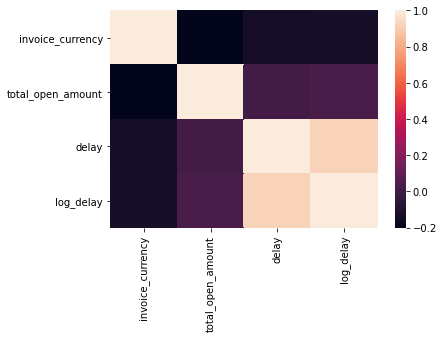

In [ ]:
sns.heatmap(train_set.corr())


#EDA (Data Analysis)

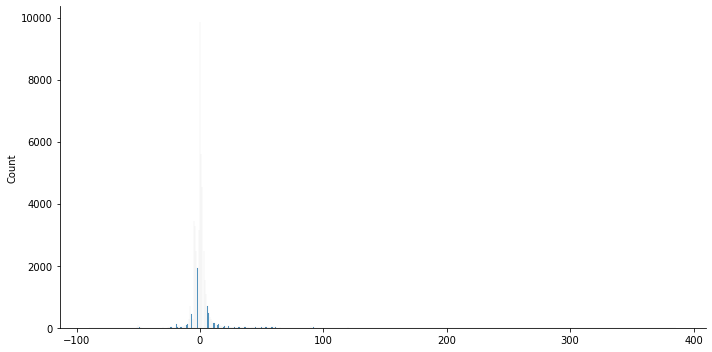

In [ ]:
del_time = list(train_set['delay'])
sns.displot(del_time,aspect= 2 ,  )

In [ ]:
train_set['delay'].describe()

count    46467.000000
mean         0.842340
std         11.005059
min        -90.000000
25%         -3.000000
50%          0.000000
75%          2.000000
max        386.000000
Name: delay, dtype: float64

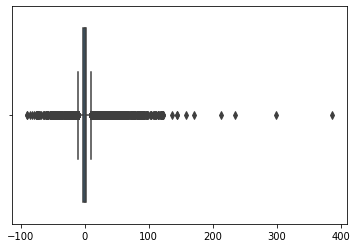

In [ ]:
sns.boxplot(x=del_time)

# spliting the train set into x_train , x_val , x_test


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_temp = train_test_split(train_set,test_size = 0.3,shuffle=True)
x_val,x_test = train_test_split(x_temp,test_size = 0.5,shuffle=True)
print(x_train.shape)
print(x_test.shape)
x_val.shape

(32526, 14)
(6971, 14)


(6970, 14)

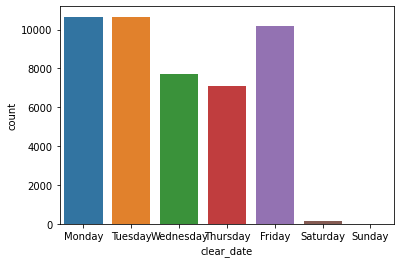

In [ ]:
day_name = pd.Series(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
day = train_set['clear_date'].dt.day_name()
sns.countplot(x=day, data=x_train, order=day_name)

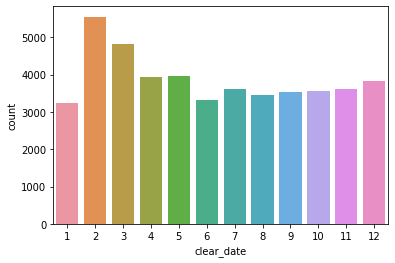

In [ ]:
month = train_set['clear_date'].dt.month
sns.countplot(x=month, data=x_train)

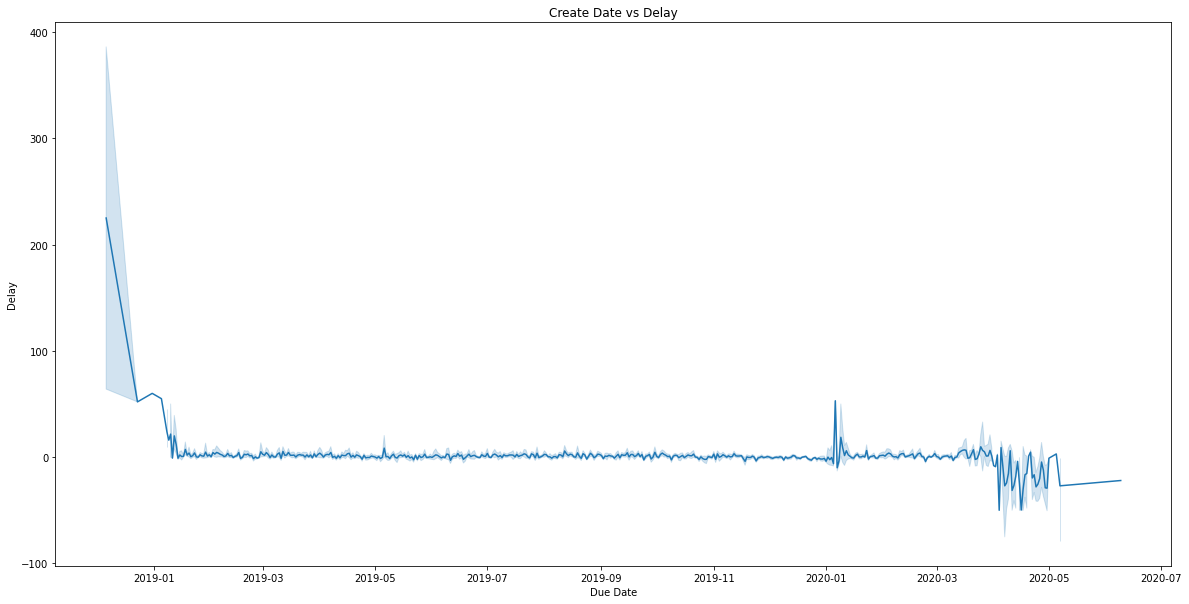

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(x=x_train['due_in_date'], y=x_train['delay'])
plt.xlabel("Due Date")
plt.ylabel("Delay")
plt.title("Create Date vs Delay")
plt.show()

In [ ]:
x_test

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,week_name,delay,log_delay
24204,U001,0200794332,COST corp,2019-03-12,2019-02-25,2019-02-25,2019-03-12,1,16647.80,2019-02-25,NAAX,Monday,0,4.510860
42864,U001,0200705089,JETR corporation,2019-09-18,2019-09-03,2019-09-03,2019-09-18,1,15676.00,2019-09-03,NAA8,Tuesday,0,4.510860
8280,U001,0200769623,WAL-MAR trust,2019-12-24,2019-12-13,2019-12-13,2019-12-28,1,60526.42,2019-12-13,NAH4,Friday,-4,4.465908
35129,U001,0200759878,SA llc,2020-03-04,2020-02-18,2020-02-18,2020-03-04,1,86057.89,2020-02-18,NAH4,Tuesday,0,4.510860
31545,U001,0200769623,WAL-MAR,2019-12-02,2019-11-21,2019-11-21,2019-12-06,1,66956.37,2019-11-21,NAH4,Thursday,-4,4.465908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39448,CA02,0140106408,WAL-M corporation,2019-10-01,2019-09-08,2019-09-08,2019-09-18,0,952.26,2019-09-08,CA10,Sunday,13,4.644391
26736,U001,0200739006,AL in,2019-07-15,2019-07-03,2019-07-03,2019-07-18,1,13004.99,2019-07-03,NAA8,Wednesday,-3,4.477337
44508,U001,0200353024,DECA us,2019-04-01,2019-03-21,2019-03-21,2019-04-08,1,612.22,2019-03-16,NAM4,Thursday,-7,4.430817
10874,U001,0200230690,DECA corp,2019-08-16,2019-08-02,2019-08-02,2019-08-24,1,557.34,2019-08-01,NAM4,Friday,-8,4.418841


In [ ]:
x_train

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,week_name,delay,log_delay
13819,U001,0200769623,WAL-MAR foundation,2019-09-17,2019-09-01,2019-09-01,2019-09-16,1,27694.89,2019-09-01,NAH4,Sunday,1,4.521789
44962,U001,200759878,SA co,2019-06-03,2019-05-16,2019-05-16,2019-05-31,1,14013.30,2019-05-16,NAH4,Thursday,3,4.543295
16376,U001,0200718130,SYSCO F us,2019-02-19,2019-02-06,2019-02-06,2019-02-21,1,13403.44,2019-02-06,NAA8,Wednesday,-2,4.488636
21678,CA02,0100031970,CAPITAL corporation,2019-01-24,2019-01-11,2019-01-11,2019-01-27,0,9744.05,2019-01-17,CA10,Friday,-3,4.477337
11612,CA02,0140105686,SYSC corp,2019-05-09,2019-04-16,2019-04-16,2019-05-03,0,12763.15,2019-04-23,CA10,Tuesday,6,4.574711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36377,U001,0200759878,SA llc,2019-03-19,2019-03-04,2019-03-04,2019-03-19,1,97553.49,2019-03-04,NAH4,Monday,0,4.510860
43317,U001,0200722444,PERFOR co,2019-05-20,2019-05-03,2019-05-03,2019-05-18,1,48433.08,2019-05-03,NAA8,Friday,2,4.532599
8506,U001,0200726979,BJ'S co,2019-07-18,2019-06-29,2019-06-29,2019-07-14,1,530.60,2019-06-29,NAA8,Saturday,4,4.553877
34335,CA02,0140104429,COSTCO us,2019-03-06,2019-02-13,2019-02-13,2019-03-03,0,89870.69,2019-02-21,CA10,Wednesday,3,4.543295


In [ ]:
x_val

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,week_name,delay,log_delay
31502,U001,0200020431,DEC foundation,2020-01-10,2020-01-06,2020-01-06,2020-01-11,1,27757.26,2020-01-01,NAM2,Monday,-1,4.499810
22692,U001,0200752393,S AB foundation,2019-09-20,2019-09-10,2019-09-10,2019-09-25,1,11828.63,2019-09-10,NAA8,Tuesday,-5,4.454347
5477,U001,0200772670,ASSOCIAT trust,2019-07-03,2019-06-19,2019-06-19,2019-07-04,1,71556.10,2019-06-19,NAU5,Wednesday,-1,4.499810
34309,U001,0100004536,BAS corp,2019-08-27,2019-08-13,2019-08-13,2019-08-28,1,2192.04,2019-08-13,NAA8,Tuesday,-1,4.499810
35773,U001,0200705742,DOT llc,2019-04-22,2019-04-05,2019-04-05,2019-05-07,1,562.70,2019-04-05,NA32,Friday,-15,4.330733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15705,U001,200769623,WAL-MAR co,2019-04-12,2019-04-02,2019-04-02,2019-04-17,1,44941.01,2019-04-02,NAH4,Tuesday,-5,4.454347
23811,U001,0200769623,WAL-MAR corporation,2019-09-10,2019-08-31,2019-08-31,2019-09-15,1,28475.18,2019-08-31,NAH4,Saturday,-5,4.454347
15626,U001,0200761734,H E BUT llc,2019-08-02,2019-07-19,2019-07-19,2019-08-03,1,115367.10,2019-07-19,NAA8,Friday,-1,4.499810
45244,U001,0200706844,WINC foundation,2019-09-12,2019-08-28,2019-08-28,2019-09-12,1,27968.59,2019-08-28,NAA8,Wednesday,0,4.510860


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


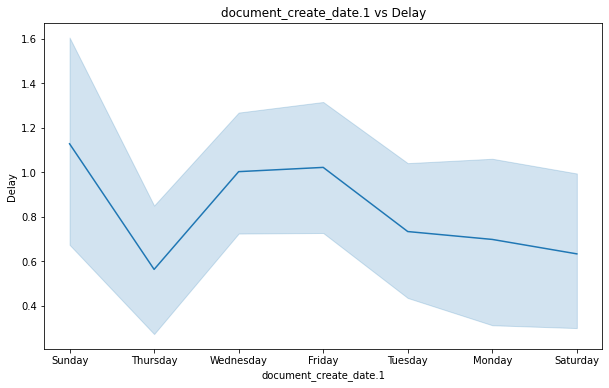

In [ ]:

plt.figure(figsize=(10,6))
sns.lineplot(x_train['week_name'], x_train['delay'])
plt.xlabel("document_create_date.1")
plt.ylabel("Delay")
plt.title("document_create_date.1 vs Delay")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


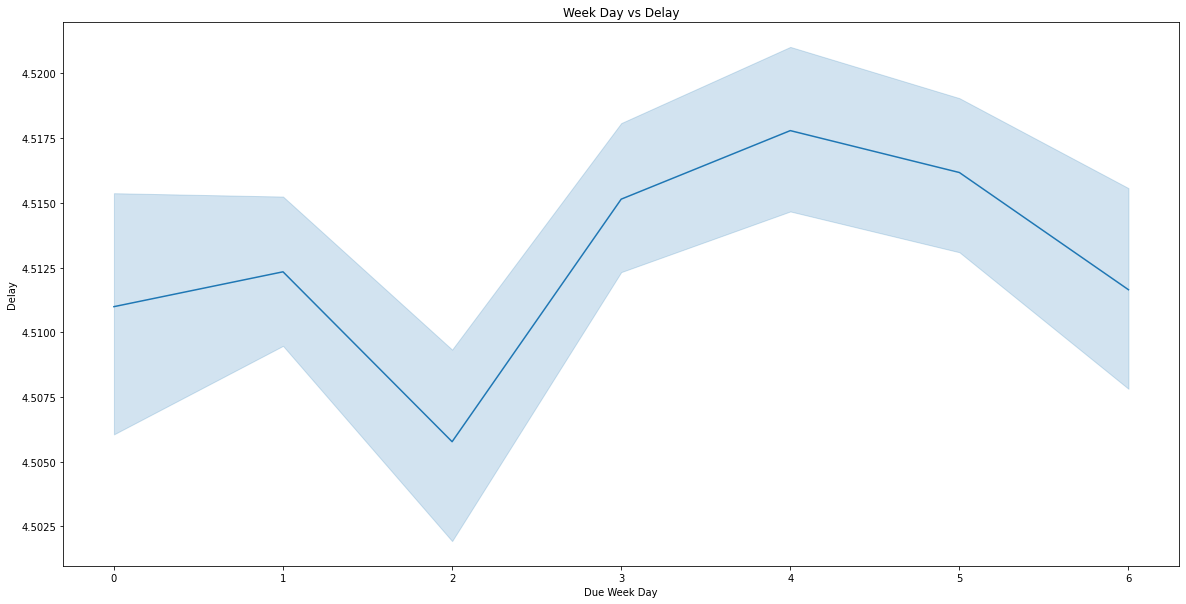

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(x_train['due_in_date'].dt.dayofweek, x_train['log_delay'])
plt.xlabel("Due Week Day")
plt.ylabel("Delay")
plt.title("Week Day vs Delay")
plt.show()

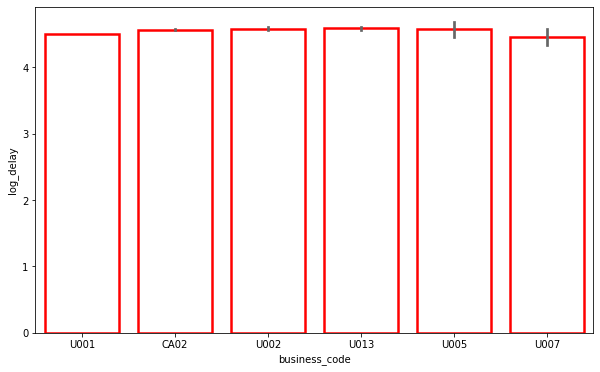

In [ ]:

plt.figure(figsize=(10,6))
sns.barplot(x="business_code", y="log_delay",data=x_train,linewidth=2.5, facecolor=(1, 1, 1, 0),
                 errcolor=".4", edgecolor="red")

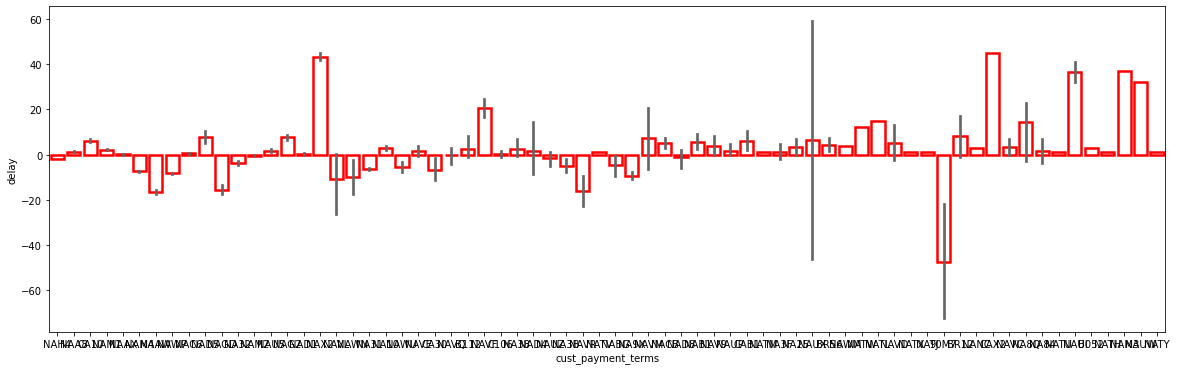

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(x="cust_payment_terms", y="delay",data=x_train,linewidth=2.5, facecolor=(1, 1, 1, 0),
                 errcolor=".4", edgecolor="red")

#Feature Engineering

# mean encoding and maping it 


In [ ]:
mean_encode=x_train.groupby('cust_payment_terms')['delay'].mean()
print(mean_encode)
x_train.loc[:,'cust_payment_terms_mean_enc']=x_train['cust_payment_terms'].map(mean_encode)
x_train
x_val.loc[:,'cust_payment_terms_mean_enc']=x_val['cust_payment_terms'].map(mean_encode)
x_val
x_test.loc[:,'cust_payment_terms_mean_enc']=x_test['cust_payment_terms'].map(mean_encode)
x_val['cust_payment_terms_mean_enc'][x_val['cust_payment_terms_mean_enc'].isnull()] = mean_encode.mean()
x_test['cust_payment_terms_mean_enc'][x_test['cust_payment_terms_mean_enc'].isnull()] = mean_encode.mean()
test_set.loc[:,'cust_payment_terms_mean_enc']=test_set['cust_payment_terms'].map(mean_encode)
test_set['cust_payment_terms_mean_enc'][test_set['cust_payment_terms_mean_enc'].isnull()] = mean_encode.mean()


cust_payment_terms
90M7   -47.333333
B052     3.000000
B112     2.333333
BR12     8.000000
BR56     4.333333
          ...    
NAWM     4.000000
NAWN    -9.816667
NAWP    -8.326531
NAWU    -5.481132
NAX2    43.267635
Name: delay, Length: 68, dtype: float64


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

In [ ]:
mean_encode1=x_train.groupby('cust_payment_terms')['log_delay'].mean()
print(mean_encode1)
x_train.loc[:,'cust_payment_terms_mean_enc1']=x_train['cust_payment_terms'].map(mean_encode1)
x_train
x_val.loc[:,'cust_payment_terms_mean_enc1']=x_val['cust_payment_terms'].map(mean_encode1)
x_val
x_test.loc[:,'cust_payment_terms_mean_enc1']=x_test['cust_payment_terms'].map(mean_encode1)
x_test['cust_payment_terms_mean_enc1'][x_test['cust_payment_terms_mean_enc1'].isnull()] = mean_encode1.mean()
x_val['cust_payment_terms_mean_enc1'][x_val['cust_payment_terms_mean_enc1'].isnull()] = mean_encode1.mean()
test_set.loc[:,'cust_payment_terms_mean_enc1']=test_set['cust_payment_terms'].map(mean_encode1)
test_set['cust_payment_terms_mean_enc1'][test_set['cust_payment_terms_mean_enc1'].isnull()] = mean_encode1.mean()


cust_payment_terms
90M7    3.474798
B052    4.543295
B112    4.535263
BR12    4.590970
BR56    4.556652
          ...   
NAWM    4.553877
NAWN    4.304668
NAWP    4.414822
NAWU    4.439275
NAX2    4.893855
Name: log_delay, Length: 68, dtype: float64


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

In [ ]:
x_val.isnull().sum()

business_code                   0
cust_number                     0
name_customer                   0
clear_date                      0
posting_date                    0
document_create_date.1          0
due_in_date                     0
invoice_currency                0
total_open_amount               0
baseline_create_date            0
cust_payment_terms              0
week_name                       0
delay                           0
log_delay                       0
cust_payment_terms_mean_enc     0
cust_payment_terms_mean_enc1    0
dtype: int64

In [ ]:
mean_encode2=x_train.groupby('cust_number')['delay'].mean()
print(mean_encode2)
x_train.loc[:,'cust_numbers_mean_enc']=x_train['cust_number'].map(mean_encode2)
x_train

x_val.loc[:,'cust_numbers_mean_enc']=x_val['cust_number'].map(mean_encode2)
x_val
x_test.loc[:,'cust_numbers_mean_enc']=x_test['cust_number'].map(mean_encode2)
x_test['cust_numbers_mean_enc'][x_test['cust_numbers_mean_enc'].isnull()] = mean_encode2.mean()
x_val['cust_numbers_mean_enc'][x_val['cust_numbers_mean_enc'].isnull()] = mean_encode2.mean()
test_set.loc[:,'cust_numbers_mean_enc']=test_set['cust_number'].map(mean_encode2)
test_set['cust_numbers_mean_enc'][test_set['cust_numbers_mean_enc'].isnull()] = mean_encode2.mean()
test_set


cust_number
0100000048    58.000000
0100000051     2.000000
0100000158    13.333333
0100000161     2.333333
0100000217    -3.000000
                ...    
CC7455        23.333333
CCCA02         7.933155
CCU001         5.600000
CCU002         6.828829
CCU013        42.771008
Name: delay, Length: 1245, dtype: float64


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,week_name,cust_payment_terms_mean_enc,cust_payment_terms_mean_enc1,cust_numbers_mean_enc
46467,U001,0200744019,TARG llc,NaT,2020-04-03,2020-04-03,2020-04-18,1,14732.09,2020-04-03,NAA8,Friday,1.268571,4.523044,2.082540
46468,U001,0200793568,SUPE,NaT,2020-05-06,2020-05-06,2020-05-21,1,6427.69,2020-05-06,NAA8,Wednesday,1.268571,4.523044,1.585492
46469,U001,0200592182,DECA,NaT,2020-04-24,2020-04-24,2020-04-26,1,17300.27,2020-04-16,NAM2,Friday,-0.549865,4.504423,-4.625000
46470,U001,0200920735,ALBERT associates,NaT,2020-03-18,2020-03-18,2020-04-02,1,134770.75,2020-03-18,NAA8,Wednesday,1.268571,4.523044,1.136364
46471,CA02,0140105847,GORDON F co,NaT,2020-03-18,2020-03-18,2020-03-30,0,2310.00,2020-03-20,CA10,Wednesday,6.146122,4.568166,5.919643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200794332,COST in,NaT,2020-03-03,2020-03-03,2020-03-18,1,76090.08,2020-03-03,NAAX,Tuesday,0.108557,4.511279,-0.482192
49996,U001,0100031704,DELHAIZE in,NaT,2020-03-12,2020-03-12,2020-03-27,1,6442.65,2020-03-12,NAA8,Thursday,1.268571,4.523044,-0.006579
49997,CA02,0140104240,FEDER in,NaT,2020-04-16,2020-04-16,2020-04-28,0,23313.43,2020-04-18,CA10,Thursday,6.146122,4.568166,0.970588
49998,U001,0200769623,WAL-MAR in,NaT,2020-03-28,2020-03-28,2020-04-12,1,39195.61,2020-03-28,NAH4,Saturday,-1.988562,4.487358,-2.364483


In [ ]:
mean_encode3=x_train.groupby('cust_number')['log_delay'].mean()
print(mean_encode3)
x_train.loc[:,'cust_numbers_mean_enc1']=x_train['cust_number'].map(mean_encode3)
x_train
x_val.loc[:,'cust_numbers_mean_enc1']=x_val['cust_number'].map(mean_encode3)
x_val
x_test.loc[:,'cust_numbers_mean_enc1']=x_test['cust_number'].map(mean_encode3)
x_val['cust_numbers_mean_enc1'][x_val['cust_numbers_mean_enc1'].isnull()] = mean_encode3.mean()
x_test['cust_numbers_mean_enc1'][x_test['cust_numbers_mean_enc1'].isnull()] = mean_encode3.mean()
test_set.loc[:,'cust_numbers_mean_enc1']=test_set['cust_number'].map(mean_encode3)
test_set['cust_numbers_mean_enc1'][test_set['cust_numbers_mean_enc1'].isnull()] = mean_encode3.mean()


cust_number
0100000048    5.001689
0100000051    4.532542
0100000158    3.356433
0100000161    4.535975
0100000217    4.477337
                ...   
CC7455        4.733212
CCCA02        4.587004
CCU001        4.565954
CCU002        4.578494
CCU013        4.890936
Name: log_delay, Length: 1245, dtype: float64


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

In [ ]:
mean_encode4=x_train.groupby('due_in_date')['delay'].mean()
print(mean_encode4)
x_train.loc[:,'due_in_date_mean_enc']=x_train['due_in_date'].map(mean_encode4)
x_train
x_val.loc[:,'due_in_date_mean_enc']=x_val['due_in_date'].map(mean_encode4)
x_val
x_test.loc[:,'due_in_date_mean_enc']=x_test['due_in_date'].map(mean_encode4)
x_test
x_val['due_in_date_mean_enc'][x_val['due_in_date_mean_enc'].isnull()] = mean_encode4.mean()
x_test['due_in_date_mean_enc'][x_test['due_in_date_mean_enc'].isnull()] = mean_encode4.mean()
test_set.loc[:,'due_in_date_mean_enc']=test_set['due_in_date'].map(mean_encode4)
test_set['due_in_date_mean_enc'][test_set['due_in_date_mean_enc'].isnull()] = mean_encode4.mean()
test_set

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


due_in_date
2018-12-06    225.0
2018-12-23     52.0
2018-12-31     60.0
2019-01-03     57.0
2019-01-04     56.0
              ...  
2020-04-30    -29.2
2020-05-01     -1.0
2020-05-05      3.0
2020-05-07    -27.0
2020-06-09    -22.0
Name: delay, Length: 488, dtype: float64


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,week_name,cust_payment_terms_mean_enc,cust_payment_terms_mean_enc1,cust_numbers_mean_enc,cust_numbers_mean_enc1,due_in_date_mean_enc
46467,U001,0200744019,TARG llc,NaT,2020-04-03,2020-04-03,2020-04-18,1,14732.09,2020-04-03,NAA8,Friday,1.268571,4.523044,2.082540,4.532008,-16.600000
46468,U001,0200793568,SUPE,NaT,2020-05-06,2020-05-06,2020-05-21,1,6427.69,2020-05-06,NAA8,Wednesday,1.268571,4.523044,1.585492,4.522709,1.144790
46469,U001,0200592182,DECA,NaT,2020-04-24,2020-04-24,2020-04-26,1,17300.27,2020-04-16,NAM2,Friday,-0.549865,4.504423,-4.625000,4.457540,-20.125000
46470,U001,0200920735,ALBERT associates,NaT,2020-03-18,2020-03-18,2020-04-02,1,134770.75,2020-03-18,NAA8,Wednesday,1.268571,4.523044,1.136364,4.523091,-9.000000
46471,CA02,0140105847,GORDON F co,NaT,2020-03-18,2020-03-18,2020-03-30,0,2310.00,2020-03-20,CA10,Wednesday,6.146122,4.568166,5.919643,4.564665,6.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200794332,COST in,NaT,2020-03-03,2020-03-03,2020-03-18,1,76090.08,2020-03-03,NAAX,Tuesday,0.108557,4.511279,-0.482192,4.501523,-1.000000
49996,U001,0100031704,DELHAIZE in,NaT,2020-03-12,2020-03-12,2020-03-27,1,6442.65,2020-03-12,NAA8,Thursday,1.268571,4.523044,-0.006579,4.497105,5.000000
49997,CA02,0140104240,FEDER in,NaT,2020-04-16,2020-04-16,2020-04-28,0,23313.43,2020-04-18,CA10,Thursday,6.146122,4.568166,0.970588,4.518389,-12.250000
49998,U001,0200769623,WAL-MAR in,NaT,2020-03-28,2020-03-28,2020-04-12,1,39195.61,2020-03-28,NAH4,Saturday,-1.988562,4.487358,-2.364483,4.483029,-26.714286


In [ ]:

x_train['week_day'] = x_train['document_create_date.1'].dt.quarter
x_val['week_day'] = x_val['document_create_date.1'].dt.quarter
x_test['week_day'] = x_test['document_create_date.1'].dt.quarter

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
x_val.isnull().sum()

business_code                   0
cust_number                     0
name_customer                   0
clear_date                      0
posting_date                    0
document_create_date.1          0
due_in_date                     0
invoice_currency                0
total_open_amount               0
baseline_create_date            0
cust_payment_terms              0
week_name                       0
delay                           0
log_delay                       0
cust_payment_terms_mean_enc     0
cust_payment_terms_mean_enc1    0
cust_numbers_mean_enc           0
cust_numbers_mean_enc1          0
due_in_date_mean_enc            0
week_day                        0
dtype: int64

In [ ]:
x_train.week_name = le.fit_transform(x_train.week_name)
x_val.week_name = le.fit_transform(x_val.week_name)
x_test.week_name = le.fit_transform(x_test.week_name)
x_train


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,week_name,delay,log_delay,cust_payment_terms_mean_enc,cust_payment_terms_mean_enc1,cust_numbers_mean_enc,cust_numbers_mean_enc1,due_in_date_mean_enc,week_day
13819,U001,0200769623,WAL-MAR foundation,2019-09-17,2019-09-01,2019-09-01,2019-09-16,1,27694.89,2019-09-01,NAH4,3,1,4.521789,-1.988562,4.487358,-2.364483,4.483029,0.197183,3
44962,U001,200759878,SA co,2019-06-03,2019-05-16,2019-05-16,2019-05-31,1,14013.30,2019-05-16,NAH4,4,3,4.543295,-1.988562,4.487358,0.880000,4.520020,0.319588,2
16376,U001,0200718130,SYSCO F us,2019-02-19,2019-02-06,2019-02-06,2019-02-21,1,13403.44,2019-02-06,NAA8,6,-2,4.488636,1.268571,4.523044,2.042553,4.531547,2.925532,1
21678,CA02,0100031970,CAPITAL corporation,2019-01-24,2019-01-11,2019-01-11,2019-01-27,0,9744.05,2019-01-17,CA10,0,-3,4.477337,6.146122,4.568166,1.428571,4.525420,1.148936,1
11612,CA02,0140105686,SYSC corp,2019-05-09,2019-04-16,2019-04-16,2019-05-03,0,12763.15,2019-04-23,CA10,5,6,4.574711,6.146122,4.568166,7.172249,4.578403,0.560000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36377,U001,0200759878,SA llc,2019-03-19,2019-03-04,2019-03-04,2019-03-19,1,97553.49,2019-03-04,NAH4,1,0,4.510860,-1.988562,4.487358,1.137233,4.522840,0.126582,1
43317,U001,0200722444,PERFOR co,2019-05-20,2019-05-03,2019-05-03,2019-05-18,1,48433.08,2019-05-03,NAA8,0,2,4.532599,1.268571,4.523044,-0.062500,4.504868,-0.194444,2
8506,U001,0200726979,BJ'S co,2019-07-18,2019-06-29,2019-06-29,2019-07-14,1,530.60,2019-06-29,NAA8,2,4,4.553877,1.268571,4.523044,1.185273,4.522236,2.034091,2
34335,CA02,0140104429,COSTCO us,2019-03-06,2019-02-13,2019-02-13,2019-03-03,0,89870.69,2019-02-21,CA10,6,3,4.543295,6.146122,4.568166,4.367589,4.554653,4.267857,1


In [ ]:
x_test.isnull().sum()

business_code                   0
cust_number                     0
name_customer                   0
clear_date                      0
posting_date                    0
document_create_date.1          0
due_in_date                     0
invoice_currency                0
total_open_amount               0
baseline_create_date            0
cust_payment_terms              0
week_name                       0
delay                           0
log_delay                       0
cust_payment_terms_mean_enc     0
cust_payment_terms_mean_enc1    0
cust_numbers_mean_enc           0
cust_numbers_mean_enc1          0
due_in_date_mean_enc            0
week_day                        0
dtype: int64

In [ ]:
x_val.isnull().sum()

business_code                   0
cust_number                     0
name_customer                   0
clear_date                      0
posting_date                    0
document_create_date.1          0
due_in_date                     0
invoice_currency                0
total_open_amount               0
baseline_create_date            0
cust_payment_terms              0
week_name                       0
delay                           0
log_delay                       0
cust_payment_terms_mean_enc     0
cust_payment_terms_mean_enc1    0
cust_numbers_mean_enc           0
cust_numbers_mean_enc1          0
due_in_date_mean_enc            0
week_day                        0
dtype: int64

In [ ]:
x_val.dtypes

business_code                           object
cust_number                             object
name_customer                           object
clear_date                      datetime64[ns]
posting_date                    datetime64[ns]
document_create_date.1          datetime64[ns]
due_in_date                     datetime64[ns]
invoice_currency                         int64
total_open_amount                      float64
baseline_create_date            datetime64[ns]
cust_payment_terms                      object
week_name                                int64
delay                                    int64
log_delay                              float64
cust_payment_terms_mean_enc            float64
cust_payment_terms_mean_enc1           float64
cust_numbers_mean_enc                  float64
cust_numbers_mean_enc1                 float64
due_in_date_mean_enc                   float64
week_day                                 int64
dtype: object

In [ ]:
x_val

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,week_name,delay,log_delay,cust_payment_terms_mean_enc,cust_payment_terms_mean_enc1,cust_numbers_mean_enc,cust_numbers_mean_enc1,due_in_date_mean_enc,week_day
31502,U001,0200020431,DEC foundation,2020-01-10,2020-01-06,2020-01-06,2020-01-11,1,27757.26,2020-01-01,NAM2,1,-1,4.499810,-0.549865,4.504423,-5.085106,4.452416,1.470588,1
22692,U001,0200752393,S AB foundation,2019-09-20,2019-09-10,2019-09-10,2019-09-25,1,11828.63,2019-09-10,NAA8,5,-5,4.454347,1.268571,4.523044,-4.538462,4.459643,0.730769,3
5477,U001,0200772670,ASSOCIAT trust,2019-07-03,2019-06-19,2019-06-19,2019-07-04,1,71556.10,2019-06-19,NAU5,6,-1,4.499810,1.689781,4.526662,1.727599,4.527154,2.096774,2
34309,U001,0100004536,BAS corp,2019-08-27,2019-08-13,2019-08-13,2019-08-28,1,2192.04,2019-08-13,NAA8,5,-1,4.499810,1.268571,4.523044,-9.333333,4.373548,-0.573171,3
35773,U001,0200705742,DOT llc,2019-04-22,2019-04-05,2019-04-05,2019-05-07,1,562.70,2019-04-05,NA32,0,-15,4.330733,-3.749469,4.461681,-6.575985,4.429529,0.338028,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15705,U001,200769623,WAL-MAR co,2019-04-12,2019-04-02,2019-04-02,2019-04-17,1,44941.01,2019-04-02,NAH4,5,-5,4.454347,-1.988562,4.487358,-2.540230,4.481524,3.609195,2
23811,U001,0200769623,WAL-MAR corporation,2019-09-10,2019-08-31,2019-08-31,2019-09-15,1,28475.18,2019-08-31,NAH4,2,-5,4.454347,-1.988562,4.487358,-2.364483,4.483029,4.134328,3
15626,U001,0200761734,H E BUT llc,2019-08-02,2019-07-19,2019-07-19,2019-08-03,1,115367.10,2019-07-19,NAA8,0,-1,4.499810,1.268571,4.523044,-2.654275,4.468191,0.316456,3
45244,U001,0200706844,WINC foundation,2019-09-12,2019-08-28,2019-08-28,2019-09-12,1,27968.59,2019-08-28,NAA8,6,0,4.510860,1.268571,4.523044,0.961832,4.515803,2.241379,3


# CORILATION AND HEAT MAP IN THE TRAING SET WITH FEATURES

In [ ]:
x_train.corr()

,invoice_currency,total_open_amount,week_name,delay,log_delay,cust_payment_terms_mean_enc,cust_payment_terms_mean_enc1,cust_numbers_mean_enc,cust_numbers_mean_enc1,due_in_date_mean_enc,week_day
invoice_currency,1.000000,-0.203345,-0.002746,-0.134157,-0.128558,-0.227976,-0.219811,-0.201506,-0.218651,-0.042691,-0.008253
total_open_amount,-0.203345,1.000000,-0.003847,0.015429,0.035779,0.079809,0.099090,0.020013,0.024050,0.019665,0.027622
week_name,-0.002746,-0.003847,1.000000,-0.000672,0.001023,-0.006468,-0.001082,0.000284,0.000032,-0.018935,-0.013818
delay,-0.134157,0.015429,-0.000672,1.000000,0.920586,0.594673,0.571753,0.669780,0.643220,0.274467,-0.024894
log_delay,-0.128558,0.035779,0.001023,0.920586,1.000000,0.567916,0.590682,0.568340,0.591809,0.247539,-0.013430
cust_payment_terms_mean_enc,-0.227976,0.079809,-0.006468,0.594673,0.567916,1.000000,0.961457,0.731974,0.715052,0.175493,0.010622
cust_payment_terms_mean_enc1,-0.219811,0.099090,-0.001082,0.571753,0.590682,0.961457,1.000000,0.635288,0.635535,0.205714,0.021925
cust_numbers_mean_enc,-0.201506,0.020013,0.000284,0.669780,0.568340,0.731974,0.635288,1.000000,0.960345,0.103613,-0.016760
cust_numbers_mean_enc1,-0.218651,0.024050,0.000032,0.643220,0.591809,0.715052,0.635535,0.960345,1.000000,0.108684,-0.013066
due_in_date_mean_enc,-0.042691,0.019665,-0.018935,0.274467,0.247539,0.175493,0.205714,0.103613,0.108684,1.000000,-0.124239


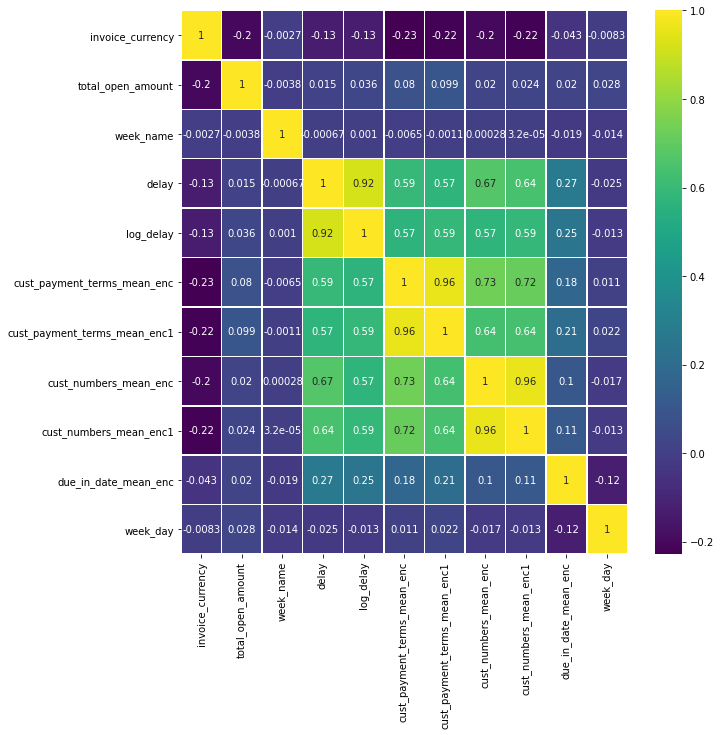

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(x_train.corr(),annot=True,cmap='viridis',linewidths=.5)

In [ ]:

test_set.invoice_currency = le.fit_transform(test_set.invoice_currency)
test_set['week_day'] = test_set['document_create_date.1'].dt.quarter
test_set



/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,week_name,cust_payment_terms_mean_enc,cust_payment_terms_mean_enc1,cust_numbers_mean_enc,cust_numbers_mean_enc1,due_in_date_mean_enc,week_day
46467,U001,0200744019,TARG llc,NaT,2020-04-03,2020-04-03,2020-04-18,1,14732.09,2020-04-03,NAA8,Friday,1.268571,4.523044,2.082540,4.532008,-16.600000,2
46468,U001,0200793568,SUPE,NaT,2020-05-06,2020-05-06,2020-05-21,1,6427.69,2020-05-06,NAA8,Wednesday,1.268571,4.523044,1.585492,4.522709,1.144790,2
46469,U001,0200592182,DECA,NaT,2020-04-24,2020-04-24,2020-04-26,1,17300.27,2020-04-16,NAM2,Friday,-0.549865,4.504423,-4.625000,4.457540,-20.125000,2
46470,U001,0200920735,ALBERT associates,NaT,2020-03-18,2020-03-18,2020-04-02,1,134770.75,2020-03-18,NAA8,Wednesday,1.268571,4.523044,1.136364,4.523091,-9.000000,1
46471,CA02,0140105847,GORDON F co,NaT,2020-03-18,2020-03-18,2020-03-30,0,2310.00,2020-03-20,CA10,Wednesday,6.146122,4.568166,5.919643,4.564665,6.333333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200794332,COST in,NaT,2020-03-03,2020-03-03,2020-03-18,1,76090.08,2020-03-03,NAAX,Tuesday,0.108557,4.511279,-0.482192,4.501523,-1.000000,1
49996,U001,0100031704,DELHAIZE in,NaT,2020-03-12,2020-03-12,2020-03-27,1,6442.65,2020-03-12,NAA8,Thursday,1.268571,4.523044,-0.006579,4.497105,5.000000,1
49997,CA02,0140104240,FEDER in,NaT,2020-04-16,2020-04-16,2020-04-28,0,23313.43,2020-04-18,CA10,Thursday,6.146122,4.568166,0.970588,4.518389,-12.250000,2
49998,U001,0200769623,WAL-MAR in,NaT,2020-03-28,2020-03-28,2020-04-12,1,39195.61,2020-03-28,NAH4,Saturday,-1.988562,4.487358,-2.364483,4.483029,-26.714286,1


# MODEL PREDICTION


TRANING THE MODEL


In [ ]:
features = [  'invoice_currency','week_day','cust_payment_terms_mean_enc1' ,'due_in_date_mean_enc' , 'cust_payment_terms_mean_enc' ,'cust_numbers_mean_enc'   ]

In [ ]:
y_train = x_train['delay']
X_train = x_train[features] 
X_val = x_val[features]
y_val = x_val['delay']
X_test = x_test[features]
Y_test = x_test['delay']
b_test = test_set[features]
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=200)
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

# FEATURE SELECTION

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(RandomForestRegressor(n_estimators=10),
          k_features=5,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 4)
sfs.fit(X_train,y_train)
sfs.k_feature_names_

('invoice_currency',
 'week_day',
 'cust_payment_terms_mean_enc1',
 'cust_payment_terms_mean_enc',
 'cust_numbers_mean_enc')

In [ ]:
predicted =model.predict(X_train)
print((mean_squared_error(y_train,predicted)))
print(sqrt(mean_squared_error(y_train,predicted)))
from sklearn.metrics import r2_score
print(r2_score(y_train,predicted))

18.524642361084293
4.3040262965140315
0.8520620776976389


VALIDATION SET TESTING


In [ ]:
from math import sqrt 
from sklearn.metrics import mean_squared_error
predicted =model.predict(X_val)
print((mean_squared_error(y_val,predicted)))
print(sqrt(mean_squared_error(y_val,predicted)))
from sklearn.metrics import r2_score
print(r2_score(y_val,predicted))
predicted


77.54698448189536
8.806076565752502
0.328002778351132


array([-2.09      , -4.225     , -0.68875   , ..., -0.60383333,
        0.87      , -2.7959183 ])

In [ ]:
x_test.isnull().sum()

business_code                   0
cust_number                     0
name_customer                   0
clear_date                      0
posting_date                    0
document_create_date.1          0
due_in_date                     0
invoice_currency                0
total_open_amount               0
baseline_create_date            0
cust_payment_terms              0
week_name                       0
delay                           0
log_delay                       0
cust_payment_terms_mean_enc     0
cust_payment_terms_mean_enc1    0
cust_numbers_mean_enc           0
cust_numbers_mean_enc1          0
due_in_date_mean_enc            0
week_day                        0
dtype: int64

TEST SET TESTING


In [ ]:
predicted =model.predict(X_test)
print((mean_squared_error(Y_test,predicted)))
print(sqrt(mean_squared_error(Y_test,predicted)))
from sklearn.metrics import r2_score
print(r2_score(Y_test,predicted))

68.81439221921737
8.295444064015944
0.36064213494211905


predicting delay for test set where clear_date is null


In [ ]:
predicate_delay =model.predict(b_test)
predicate_delay

array([ 1.287875  ,  0.96516667,  0.62617721, ...,  4.245     ,
       -3.94770177, -0.29611508])

In [ ]:
predicted_aging_bucket = []
for item in predicate_delay:
    if item<=15:
        predicted_aging_bucket.append('0-15 days')
    elif item<=30:
        predicted_aging_bucket.append('16-30 days')
    elif item<=45:
        predicted_aging_bucket.append('31-45 days')
    elif item<=60:
        predicted_aging_bucket.append('46-60 days')
    else:
        predicted_aging_bucket.append('>60 days')
predicted_aging_bucket



adding the predicted delay to the due in date to find the  predicted clear date in the data set


In [ ]:
test_set['Predicted delay'] = predicate_delay  #rounding this value to get a proper date
test_set['Predicted cleardate  '] = pd.to_datetime(test_set['due_in_date'],format = '%Y%m%d') + pd.to_timedelta(round(test_set['Predicted delay']),unit= 'd')
test_set['Predicted ageing bucket'] = predicted_aging_bucket 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

# Final test data set

In [ ]:
test_set

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,week_name,cust_payment_terms_mean_enc,cust_payment_terms_mean_enc1,cust_numbers_mean_enc,cust_numbers_mean_enc1,due_in_date_mean_enc,week_day,Predicted delay,Predicted cleardate,Predicted ageing bucket
46467,U001,0200744019,TARG llc,NaT,2020-04-03,2020-04-03,2020-04-18,1,14732.09,2020-04-03,NAA8,Friday,1.268571,4.523044,2.082540,4.532008,-16.600000,2,1.287875,2020-04-19,0-15 days
46468,U001,0200793568,SUPE,NaT,2020-05-06,2020-05-06,2020-05-21,1,6427.69,2020-05-06,NAA8,Wednesday,1.268571,4.523044,1.585492,4.522709,1.144790,2,0.965167,2020-05-22,0-15 days
46469,U001,0200592182,DECA,NaT,2020-04-24,2020-04-24,2020-04-26,1,17300.27,2020-04-16,NAM2,Friday,-0.549865,4.504423,-4.625000,4.457540,-20.125000,2,0.626177,2020-04-27,0-15 days
46470,U001,0200920735,ALBERT associates,NaT,2020-03-18,2020-03-18,2020-04-02,1,134770.75,2020-03-18,NAA8,Wednesday,1.268571,4.523044,1.136364,4.523091,-9.000000,1,0.213143,2020-04-02,0-15 days
46471,CA02,0140105847,GORDON F co,NaT,2020-03-18,2020-03-18,2020-03-30,0,2310.00,2020-03-20,CA10,Wednesday,6.146122,4.568166,5.919643,4.564665,6.333333,1,9.243833,2020-04-08,0-15 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200794332,COST in,NaT,2020-03-03,2020-03-03,2020-03-18,1,76090.08,2020-03-03,NAAX,Tuesday,0.108557,4.511279,-0.482192,4.501523,-1.000000,1,-0.773379,2020-03-17,0-15 days
49996,U001,0100031704,DELHAIZE in,NaT,2020-03-12,2020-03-12,2020-03-27,1,6442.65,2020-03-12,NAA8,Thursday,1.268571,4.523044,-0.006579,4.497105,5.000000,1,10.777500,2020-04-07,0-15 days
49997,CA02,0140104240,FEDER in,NaT,2020-04-16,2020-04-16,2020-04-28,0,23313.43,2020-04-18,CA10,Thursday,6.146122,4.568166,0.970588,4.518389,-12.250000,2,4.245000,2020-05-02,0-15 days
49998,U001,0200769623,WAL-MAR in,NaT,2020-03-28,2020-03-28,2020-04-12,1,39195.61,2020-03-28,NAH4,Saturday,-1.988562,4.487358,-2.364483,4.483029,-26.714286,1,-3.947702,2020-04-08,0-15 days
